Estimated number of clusters: 3
Estimated number of noise points: 13
Silhouette Coefficient: 0.651


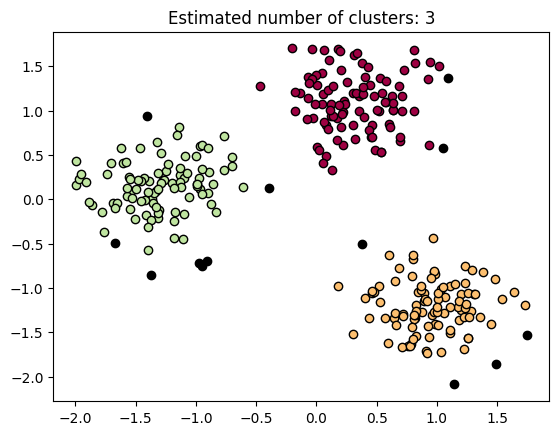

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.50, random_state=0)

# Standardize the data
X = StandardScaler().fit_transform(X)

# Apply DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

# Plot result
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


No of clusters: 3


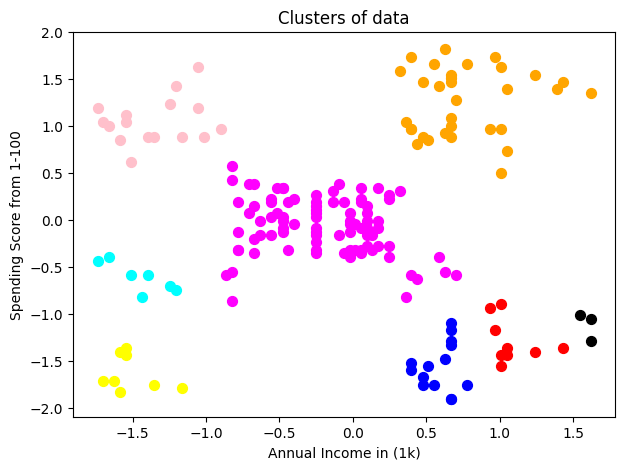

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics

data= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATASET/dataset1/mall_customers.csv")
data.drop(["Customer ID"],axis=1,inplace=True)
data.head()
X=data.iloc[:,[2,3]].values


# Standardize the data
X = StandardScaler().fit_transform(X)

# Apply DBSCAN
db = DBSCAN(eps=0.3, min_samples=4,metric='euclidean')
model=db.fit(X)
label=model.labels_

#identifying the points which makes up our core points
sample_cores=np.zeros_like(labels,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(labels))- (1 if -1 in labels else 0)
print('No of clusters:',n_clusters)

y_means = db.fit_predict(X)
plt.figure(figsize=(7,5))
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(X[y_means == 5, 0], X[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(X[y_means == 6, 0], X[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(X[y_means == 7, 0], X[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(X[y_means == 8, 0], X[y_means == 8, 1], s = 50, c = 'violet')
plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending Score from 1-100')
plt.title('Clusters of data')
plt.show()